In [69]:
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image as img
import matplotlib.pyplot as plt
import cv2 as cv2
import torch
import torchvision
from torchvision import models
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
from torch.optim import Adam
from torch.nn import Conv2d,BatchNorm1d,ReLU,MaxPool2d,Linear,Dropout,Softmax,CrossEntropyLoss,BatchNorm2d

In [70]:
from torchvision.datasets import MNIST
from torchvision import transforms

Import the MNIST training and test dataset

In [126]:
train_data = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        transforms.ToTensor()
                        
                    ]), train=True)

In [127]:
test_data = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        transforms.ToTensor()
                    ]), train=False)

Build the Model

In [128]:
class MNIST_NN(nn.Module):
  def __init__(self):
    super(MNIST_NN, self).__init__()
    self.conv_layers = nn.Sequential(
        
      Conv2d(1, 64, 3,1,1),
      BatchNorm2d(64),
      ReLU(inplace=True),
      MaxPool2d(2,2),
      
      Conv2d(64, 128, 3,1,1),
      BatchNorm2d(128),
      ReLU(inplace=True),
      MaxPool2d(2,2),
      
      Conv2d(128, 256, 3,1,1),
      BatchNorm2d(256),
      ReLU(inplace=True),
      
      Conv2d(256, 256, 3,1,1),
      BatchNorm2d(256),
      ReLU(inplace=True),
      MaxPool2d(2, 2),
      
      Conv2d(256, 512, 3,1,1),
      BatchNorm2d(512),
      ReLU(inplace=True),
      
      Conv2d(512, 512,3,1,1),
      BatchNorm2d(512),
      ReLU(inplace=True),
      MaxPool2d(2,2),
      
      Conv2d(512, 512, 3,1,1),
      BatchNorm2d(512),
      ReLU(inplace=True),
      
      Conv2d(512, 512, 3,1,1),
      BatchNorm2d(512),
      ReLU(inplace=True),
      MaxPool2d(2,2),
    )

    self.fc_layers = nn.Sequential(
      Linear(512, 4096),
      Dropout(p=0.5),
      Linear(4096, 4096),
      Dropout(p=0.5),
      Linear(4096, 10),   
    )


  def forward(self,x):
    x = self.conv_layers(x)
    x = x.squeeze()
    x.unsqueeze(0)
    x = self.fc_layers(x)
    x=x.unsqueeze(0)

    return x

In [129]:

model = MNIST_NN()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 1e-5)


if torch.cuda.is_available():
  print("cuda is enabled")
  device = torch.device("cuda:0")
  model = model.cuda()
  criterion = criterion.cuda()
else:
  device = torch.device("cpu")



cuda is enabled


Use 1/10 of the training data to train

In [145]:
part_train_data, rest_train_data=torch.utils.data.random_split(train_data,[6000,54000])

train_loader = torch.utils.data.DataLoader(
    dataset= part_train_data, batch_size=1, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_data, batch_size=1, shuffle=True
)


In [146]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []



for epoch in range(5):

    print(f"Epoch: {epoch + 1}")

    # train
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to(device),y_train.to(device)

        optimizer.zero_grad()

        output_train = model(x_train)

        loss_train = criterion(output_train, y_train)

        loss_train.backward()

        optimizer.step()


    train_loss_total = 0
    correct_train = 0
    
    # TRAIN INFO
    for x_train, y_train in train_loader:
      
        x_train, y_train = x_train.to(device),y_train.to(device)
        
        output_train = model(x_train)
        output_class = output_train.argmax(dim=1, keepdim=True)
        if output_class == y_train:
            correct_train += 1

        loss_train = criterion(output_train, y_train)

        train_loss_total += loss_train.item()

    train_loss.append(train_loss_total/len(train_loader))
    train_accuracy.append(100*correct_train/len(train_loader))
    
    print('Train Loss',train_loss[epoch])
    print('Train Accuracy', train_accuracy[epoch])
    
    
    # TEST INFO
    correct_test = 0
    test_loss_total = 0

    for x_test, y_test in test_loader:
        x_test, y_test = x_test.to(device),y_test.to(device)
        output_test = model(x_test)
        outClass = output_test.argmax(dim=1, keepdim=True)

        if outClass == y_test:
            correct_test += 1

        loss_test = criterion(output_test, y_test)
        test_loss_total += loss_test.item()
    test_loss.append(test_loss_total/len(test_loader))
    test_accuracy.append(100*correct_test/len(test_loader))

    print('Test loss',test_loss[epoch])
    print('Test accuracy', test_accuracy[epoch])



Epoch: 1
Train Loss 0.23835255682487222
Train Accuracy 95.5
Test loss 0.24718037324892575
Test accuracy 95.52
Epoch: 2
Train Loss 0.02323857472559582
Train Accuracy 99.41666666666667
Test loss 0.07098809463041145
Test accuracy 98.59
Epoch: 3
Train Loss 0.013966428709020831
Train Accuracy 99.7
Test loss 0.05863765000093689
Test accuracy 98.86
Epoch: 4
Train Loss 0.005170590807283582
Train Accuracy 99.9
Test loss 0.06019486544277135
Test accuracy 98.9
Epoch: 5
Train Loss 0.020551120075160023
Train Accuracy 99.45
Test loss 0.08937581202544391
Test accuracy 98.57


Part b     Plot 

In [147]:
x = [1,2,3,4,5]

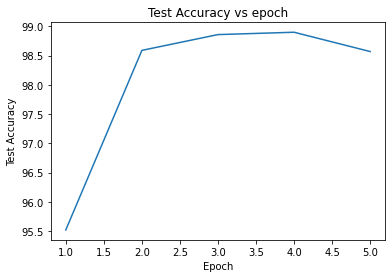

In [148]:
plt.plot(x, test_accuracy)
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs epoch')
plt.xlabel('Epoch')
plt.show()

Text(0.5, 0, 'Epoch')

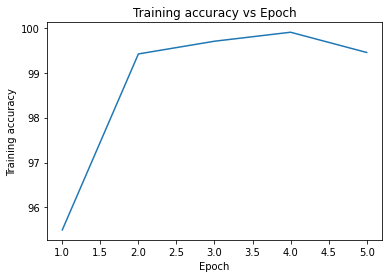

In [149]:
plt.plot(x, train_accuracy)
plt.ylabel('Training accuracy')
plt.title('Training accuracy vs Epoch')
plt.xlabel('Epoch')


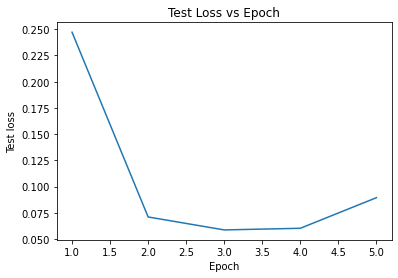

In [150]:
plt.plot(x, test_loss)
plt.ylabel('Test loss')
plt.title('Test Loss vs Epoch')
plt.xlabel('Epoch')
plt.show()

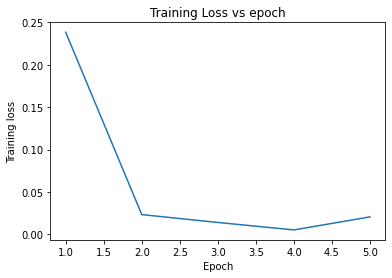

In [151]:
plt.plot(x, train_loss)
plt.ylabel('Training loss')
plt.title('Training Loss vs epoch')
plt.xlabel('Epoch')
plt.show()

Part c (i)

Horizontal Flip

In [152]:
test_data_hflip = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        torchvision.transforms.RandomHorizontalFlip(p=1),
                        transforms.ToTensor()
                    ]), train=False)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data_hflip, batch_size=1, shuffle=True
)



In [153]:
correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Flip the test dataset horizontally')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))


Flip the test dataset horizontally
Testing loss 6.815444380948635
Testing accuracy 42.83


We can see that the testing accuracy is reduced a lot 

Vertical Flip

In [154]:
test_data_vflip = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        torchvision.transforms.RandomVerticalFlip(p=1),
                        transforms.ToTensor()
                    ]), train=False)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data_vflip, batch_size=1, shuffle=True
)



In [155]:
correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Flip the test dataset vertically')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))


Flip the test dataset vertically
Testing loss 8.22559674407586
Testing accuracy 39.81


We can see that the testing accuracy is reduced a lot 

Part c(ii)

Gaussian Noise of 0.01

In [156]:
test_data_noise = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize((32,32)),
                        transforms.ToTensor(),
                        torchvision.transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x))
                    ]), train=False)


test_loader_noise = torch.utils.data.DataLoader(
    dataset=test_data_noise, batch_size=1, shuffle=True
)


correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader_noise:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)


    loss_test = criterion(output_test, y_test)

    _ , pred = torch.max(output_test,1)

    num_correct = (pred == y_test).sum()

    correct_test += num_correct.item()

    test_loss_total += loss_test.item()



print('Gaussian noise of 0.01')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))



Gaussian noise of 0.01
Testing loss 0.13073470065453957
Testing accuracy 97.89


We see that the testing accuracy with guassian noise of 0.01 has relatively few effects on accuracy

Gaussian nosie of 0.1

In [159]:
test_data_noise = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        transforms.ToTensor(),
                        torchvision.transforms.Lambda(lambda x : x + np.sqrt(0.1)*torch.randn_like(x))
                    ]), train=False)


test_loader_noise = torch.utils.data.DataLoader(
    dataset=test_data_noise, batch_size=1, shuffle=True
)


correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader_noise:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Gaussian noise of 0.01')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))



Gaussian noise of 0.01
Testing loss 0.43839553867600933
Testing accuracy 92.18


We can see that the pictures get more blurred and the test accuracy become lower

Gaussian with nosie of 1

In [160]:
test_data_noise = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        transforms.ToTensor(),
                        torchvision.transforms.Lambda(lambda x : x + 1*torch.randn_like(x))
                    ]), train=False)


test_loader_noise = torch.utils.data.DataLoader(
    dataset=test_data_noise, batch_size=1, shuffle=True
)


correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader_noise:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Gaussian noise of 0.01')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))



Gaussian noise of 0.01
Testing loss 3.6377841543315763
Testing accuracy 45.3


Nosie of 1 makes the accuracy very low and the picture very blurred

Part d    Data Augmentation Combine flipped data

Train the Model

In [158]:
train_data = MNIST('./', download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        torchvision.transforms.Resize(32),
                    ]), train=True)

train_data, _=torch.utils.data.random_split(train_data,[6000,54000])


train_data_hflip = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        torchvision.transforms.RandomHorizontalFlip(p=1),
                        transforms.ToTensor()
                    ]), train=True)

train_data_hflip, _=torch.utils.data.random_split(train_data_hflip,[2000,58000])



train_data_vflip = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        torchvision.transforms.RandomVerticalFlip(p=1),
                        transforms.ToTensor()
                    ]), train=True)

train_data_vflip, _=torch.utils.data.random_split(train_data_vflip,[2000,58000])


train_data_all = train_data + train_data_hflip + train_data_vflip



In [117]:
test_data = MNIST('./', download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        torchvision.transforms.Resize(32),
                    ]), train=False)

train_loader = torch.utils.data.DataLoader(
    dataset=train_data_all, batch_size=1, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_data, batch_size=1, shuffle=True
)

print(len(test_data))

10000


In [118]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []



for epoch in range(5):

    print(f"Epoch: {epoch + 1}")

    # train
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to(device),y_train.to(device)

        optimizer.zero_grad()

        output_train = model(x_train)

        loss_train = criterion(output_train, y_train)

        loss_train.backward()

        optimizer.step()


    train_loss_total = 0
    correct_train = 0
    
    # TRAIN INFO
    for x_train, y_train in train_loader:
      
        x_train, y_train = x_train.to(device),y_train.to(device)
        
        output_train = model(x_train)
        output_class = output_train.argmax(dim=1, keepdim=True)
        if output_class == y_train:
            correct_train += 1

        loss_train = criterion(output_train, y_train)

        train_loss_total += loss_train.item()

    train_loss.append(train_loss_total/len(train_loader))
    train_accuracy.append(100*correct_train/len(train_loader))
    
    print('Train Loss',train_loss[epoch])
    print('Train Accuracy', train_accuracy[epoch])
    
    
    # TEST INFO
    correct_test = 0
    test_loss_total = 0

    for x_test, y_test in test_loader:
        x_test, y_test = x_test.to(device),y_test.to(device)
        output_test = model(x_test)
        outClass = output_test.argmax(dim=1, keepdim=True)

        if outClass == y_test:
            correct_test += 1

        loss_test = criterion(output_test, y_test)
        test_loss_total += loss_test.item()
    test_loss.append(test_loss_total/len(test_loader))
    test_accuracy.append(100*correct_test/len(test_loader))

    print('Test loss',test_loss[epoch])
    print('Test accuracy', test_accuracy[epoch])

Epoch: 1
Train Loss 0.15158287361366246
Train Accuracy 95.37
Test loss 0.17498657110535643
Test accuracy 95.03
Epoch: 2
Train Loss 0.08598380994791131
Train Accuracy 97.3
Test loss 0.13092291457253338
Test accuracy 96.43
Epoch: 3
Train Loss 0.2981768087756458
Train Accuracy 92.27
Test loss 0.39217562839760484
Test accuracy 91.77
Epoch: 4
Train Loss 0.1560123842242735
Train Accuracy 95.8
Test loss 0.22928877578306792
Test accuracy 94.61
Epoch: 5
Train Loss 0.0643265461383741
Train Accuracy 98.1
Test loss 0.19841981958846405
Test accuracy 96.16


Now use the augmented model with horizontal flip

In [119]:
test_data_hflip = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        torchvision.transforms.RandomHorizontalFlip(p=1),
                        transforms.ToTensor()
                    ]), train=False)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data_hflip, batch_size=1, shuffle=True
)



In [120]:
correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Flip the test dataset horizontally')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))


Flip the test dataset horizontally
Testing loss 0.37901148349698865
Testing accuracy 91.49


We can see that with the augmented model, the horizontal slip accuracy increases a lot

Vertical Flip

In [121]:
test_data_vflip = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        torchvision.transforms.RandomVerticalFlip(p=1),
                        transforms.ToTensor()
                    ]), train=False)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data_vflip, batch_size=1, shuffle=True
)



In [122]:
correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Flip the test dataset horizontally')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))


Flip the test dataset horizontally
Testing loss 0.4162898309956348
Testing accuracy 91.3


We can see that the augmented model also improves the vertical flip very well.

Gaussian Noise of 0.01

In [123]:
test_data_noise = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize((32,32)),
                        transforms.ToTensor(),
                        torchvision.transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x))
                    ]), train=False)


test_loader_noise = torch.utils.data.DataLoader(
    dataset=test_data_noise, batch_size=1, shuffle=True
)


correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader_noise:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)


    loss_test = criterion(output_test, y_test)

    _ , pred = torch.max(output_test,1)

    num_correct = (pred == y_test).sum()

    correct_test += num_correct.item()

    test_loss_total += loss_test.item()



print('Gaussian noise of 0.01')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))

Gaussian noise of 0.01
Testing loss 0.25835393599553264
Testing accuracy 94.38


Gaussian nosise of 1 with augmented model

In [124]:
test_data_noise = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        transforms.ToTensor(),
                        torchvision.transforms.Lambda(lambda x : x + np.sqrt(0.1)*torch.randn_like(x))
                    ]), train=False)


test_loader_noise = torch.utils.data.DataLoader(
    dataset=test_data_noise, batch_size=1, shuffle=True
)


correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader_noise:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Gaussian noise of 0.01')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))

Gaussian noise of 0.01
Testing loss 1.4379993515461043
Testing accuracy 68.19


Since we did not include the gaussian noise data into the augmented model, we can see the this does not improve the performance of gaussian noise of 0.1, it is still not good

Gaussian noise of 1 on augmented model

In [125]:
test_data_noise = MNIST('./', download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.Resize(32),
                        transforms.ToTensor(),
                        torchvision.transforms.Lambda(lambda x : x + 1*torch.randn_like(x))
                    ]), train=False)


test_loader_noise = torch.utils.data.DataLoader(
    dataset=test_data_noise, batch_size=1, shuffle=True
)


correct_test = 0
test_loss_total = 0

for x_test, y_test in test_loader_noise:

    x_test, y_test = x_test.to(device),y_test.to(device)
    output_test = model(x_test)
    outClass = output_test.argmax(dim=1, keepdim=True)

    if outClass == y_test:
        correct_test += 1

    loss_test = criterion(output_test, y_test)

    test_loss_total += loss_test.item()



print('Gaussian noise of 0.01')
print('Testing loss',test_loss_total/len(test_loader))
print('Testing accuracy',100*correct_test/len(test_loader))

Gaussian noise of 0.01
Testing loss 5.003569020628818
Testing accuracy 21.31


Since we did not include the gaussian noise data into the augmented model, we can see the this does not improve the performance of gaussian noise of 1, it is still not good